## 1. Impor Pustaka


In [ ]:
# data
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# pemprosesan & pemodelan data
import sklearn
import skops.io as sio
from skops.io import dump, load, get_untrusted_types
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import minmax_scale, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## 2. Baca Kumpulan Data

In [2]:
data = pd.read_csv(f"Data/credit_risk_dataset.csv")

data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [4]:
data.shape

(32581, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## 3. Analisis Data Eksplorasi


In [6]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
data.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [8]:
data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [9]:
data.duplicated().sum()

np.int64(165)

In [10]:
# data.corr()
data.select_dtypes(include=np.number).corr()
# data.select_dtypes().corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


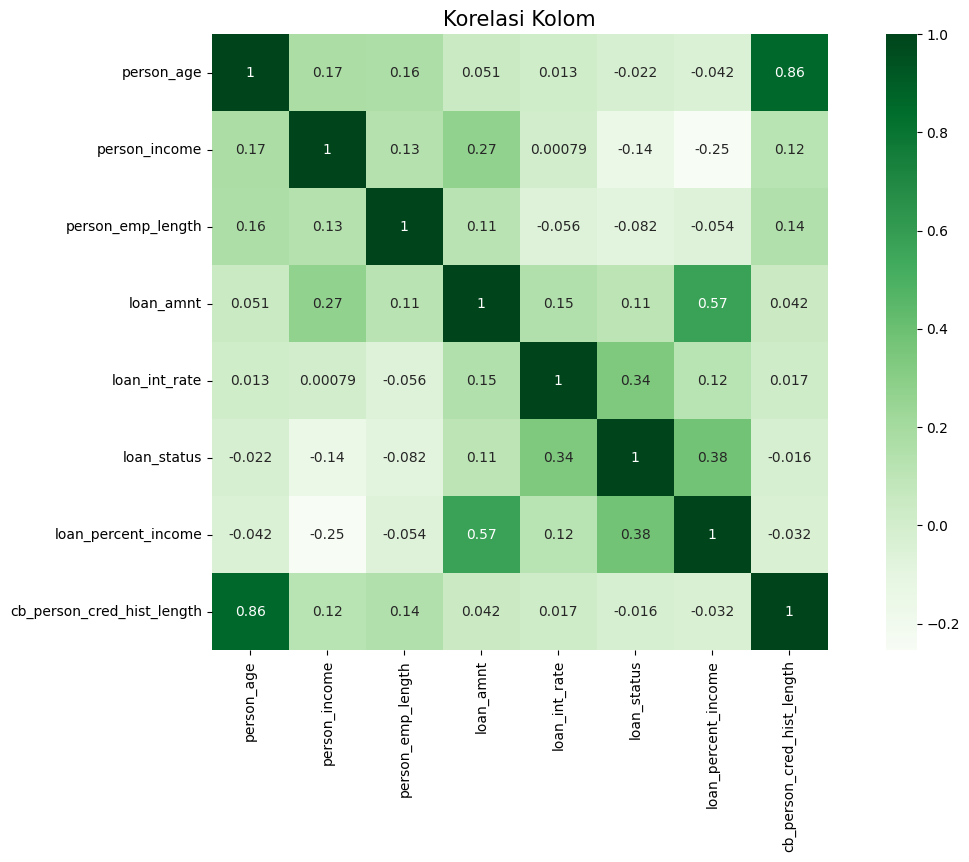

In [11]:
# perikas korelasi antar kolom
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.select_dtypes(include=np.number).corr(), vmax =1., square = True, annot = True,cmap='Greens' )
plt.title('Korelasi Kolom',fontsize=15);

<div style="background-color: #ddefdd; padding: 10px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Deskripsi Fitur</h1>
</div>

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
    <ul>
        <li><b>person_age:</b> Usia individu yang mengajukan pinjaman.</li>
        <li><b>person_income:</b> Penghasilan tahunan individu.</li>
        <li><b>person_home_ownership:</b> Jenis kepemilikan rumah individu.
            <ul>
                <li>rent: Individu tersebut saat ini menyewa properti.</li>
                <li>mortgage: Individu tersebut memiliki hipotek (perjanjian pinjaman) atas properti yang mereka miliki.</li>
                <li>own: Individu tersebut memiliki rumah mereka secara langsung.</li>
                <li>other: Kategori kepemilikan rumah lain yang mungkin spesifik untuk kumpulan data.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Lama kerja individu dalam tahun.</li>
        <li><b>loan_intent:</b> Maksud di balik pengajuan pinjaman.
          <ul>
            <li>Education: Peminjam perlu membiayai peindidikan</li>
            <li>Medical: Peminjam perlu membiayai pengobatan</li>
            <li>Venture: Peminjam perlu dana untuk pengembangan bisnis</li>
            <li>Personal: Peminjam perlu membiayai biaya hidup</li>
            <li>Debtconsolidation: Peminjam ingin menggabungkan beberapa pinjaman sebelumnya menjadi satu pinjaman</li>
            <li>Homeimprovement: Peminjam perlu melakukan perbaikan rumah</li>
          </ul>
        </li>
        <li><b>loan_grade:</b> Nilai yang diberikan untuk pinjaman berdasarkan kelayakan kredit peminjam.
            <ul>
                <li>A: Peminjam memiliki kelayakan kredit yang tinggi, menunjukkan risiko rendah.</li>
                <li>B: Peminjam relatif berisiko rendah, tetapi tidak layak dikreditkan seperti Grade A.</li>
                <li>C: Kelayakan kredit peminjam sedang.</li>
                <li>D: Peminjam dianggap memiliki risiko lebih tinggi dibandingkan dengan nilai sebelumnya.</li>
                <li>E: Kelayakan kredit peminjam lebih rendah, menunjukkan risiko yang lebih tinggi.</li>
                <li>F: Peminjam menimbulkan risiko kredit yang signifikan.</li>
                <li>G: Kelayakan kredit peminjam adalah yang terendah, menandakan risiko tertinggi.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b> Jumlah pinjaman yang diminta oleh individu.</li>
        <li><b>loan_int_rate:</b> Suku bunga yang terkait dengan pinjaman.</li>
        <li><b>loan_status:</b> Status pinjaman dari pengaju pinjaman.
            <ul>
                <li>0: Non-default - Peminjam berhasil menerima pinjaman dan potensi adanya gagal bayar rendah.</li>
                <li>1: Default - Peminjam gagal menerima pinjaman dan potensi gagal bayar tinggi.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b> Persentase pendapatan yang diwakili oleh jumlah pinjaman.</li>
        <li><b>cb_person_default_on_file:</b> Riwayat gagal bayar individu sesuai catatan biro kredit.
            <ul>
                <li>Y: Individu tersebut memiliki riwayat gagal bayar pada file kredit mereka.</li>
                <li>N: Individu tersebut tidak memiliki riwayat gagal bayar.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b> Panjang riwayat kredit untuk individu.</li>
    </ul>
</div>


## 4. Membersihkan data


In [12]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
# drop values that are null
data.dropna(axis=0,inplace=True)

In [14]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
data.duplicated().sum()

np.int64(137)

In [16]:
data = data.drop_duplicates()

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)

In [19]:
data['person_age'].value_counts()

person_age
23     3390
22     3144
24     3109
25     2686
26     2188
27     1880
28     1619
29     1488
30     1122
21     1048
31     1006
32      857
33      757
34      624
35      558
36      481
37      409
38      321
39      269
40      235
41      218
42      164
43      142
44      116
45       91
46       86
47       76
48       65
50       45
49       40
51       33
52       33
53       26
54       21
55       18
58       17
57       15
20       14
56       14
60       13
61        8
66        8
64        7
62        6
65        5
69        5
70        5
59        5
144       3
63        3
73        2
123       1
78        1
80        1
84        1
76        1
67        1
Name: count, dtype: int64

<BarContainer object of 57 artists>

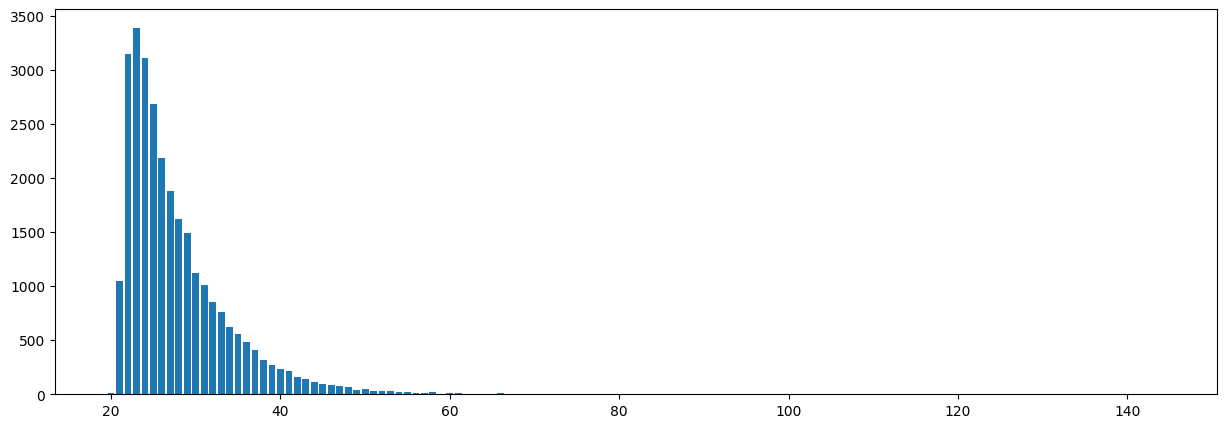

In [20]:
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)

In [21]:
(data['person_age'].value_counts().values>55).sum()

np.int64(28)

In [22]:
data = data.drop(data[data['person_age'] > 55].index, axis=0)

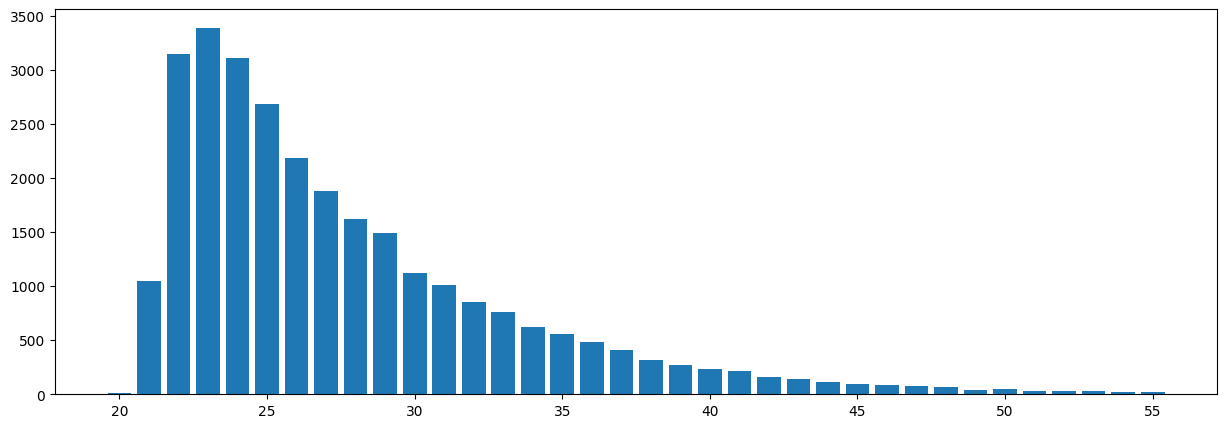

In [23]:
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
plt.show()

In [24]:
data['person_emp_length'].value_counts().sort_index()

person_emp_length
0.0      3672
1.0      2611
2.0      3439
3.0      3107
4.0      2554
5.0      2686
6.0      2377
7.0      1955
8.0      1523
9.0      1221
10.0      628
11.0      657
12.0      512
13.0      378
14.0      303
15.0      211
16.0      152
17.0      112
18.0       95
19.0       61
20.0       34
21.0       32
22.0       18
23.0        9
24.0        7
25.0        8
26.0        4
27.0        4
28.0        2
31.0        4
38.0        1
123.0       2
Name: count, dtype: int64

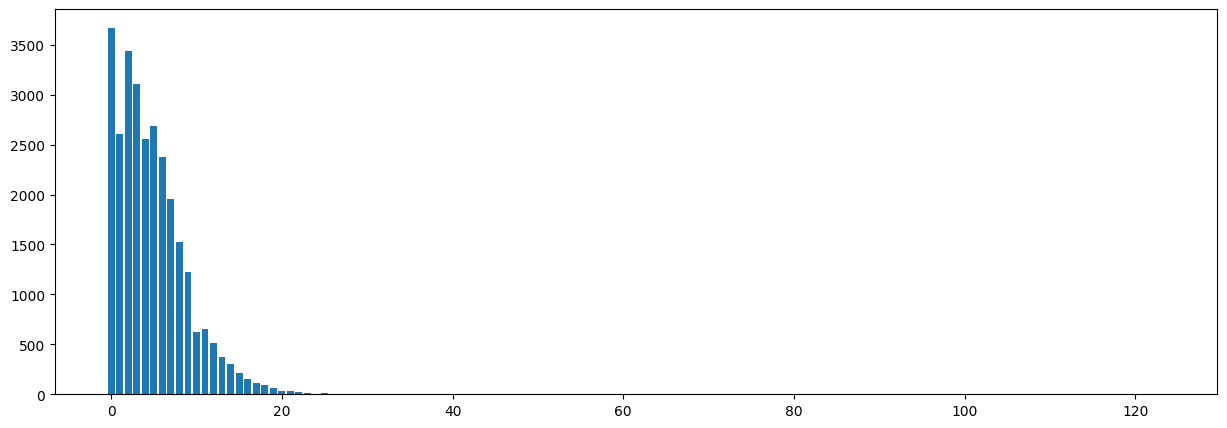

In [25]:
verti = data['person_emp_length'].value_counts().values
hori = data['person_emp_length'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
plt.show()

In [26]:
data = data.drop(data[data['person_emp_length'] > 38].index, axis=0)

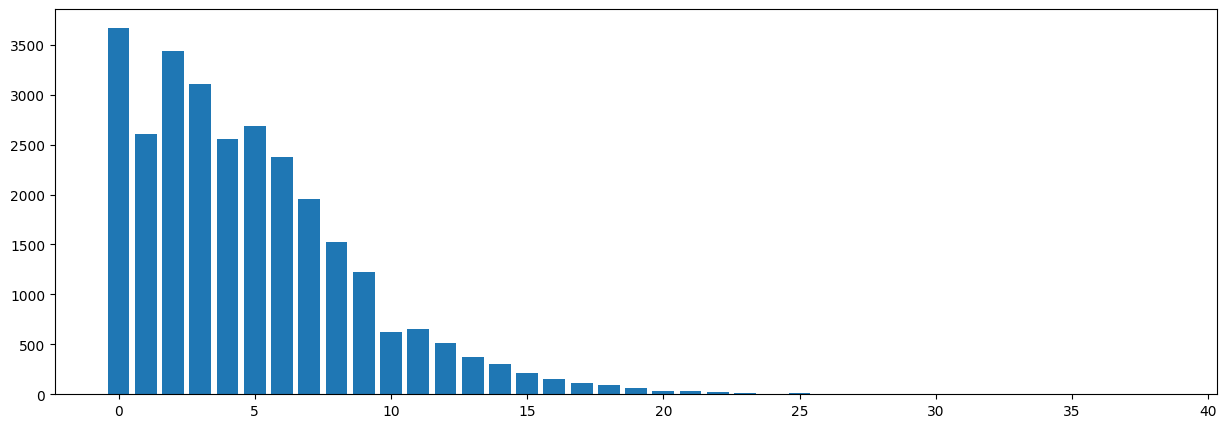

In [27]:
verti = data['person_emp_length'].value_counts().values
hori = data['person_emp_length'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
plt.show()

## 5. Feature Engineering


In [28]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28377 entries, 0 to 28376
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28377 non-null  int64  
 1   person_income               28377 non-null  int64  
 2   person_home_ownership       28377 non-null  object 
 3   person_emp_length           28377 non-null  float64
 4   loan_intent                 28377 non-null  object 
 5   loan_grade                  28377 non-null  object 
 6   loan_amnt                   28377 non-null  int64  
 7   loan_int_rate               28377 non-null  float64
 8   loan_status                 28377 non-null  int64  
 9   loan_percent_income         28377 non-null  float64
 10  cb_person_default_on_file   28377 non-null  object 
 11  cb_person_cred_hist_length  28377 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.6+ MB


In [30]:
# Mengonversi Data Kategorikal menjadi Numerik (Label Encoding)
cat_columns = ['cb_person_default_on_file', 'person_home_ownership','loan_intent']

default_on_file = LabelEncoder()
default_on_file.fit( data[cat_columns[0]])

home = LabelEncoder()
home.fit( data[cat_columns[1]] )

loan = LabelEncoder()
loan.fit( data[cat_columns[2]] )

LabelEncoder()

In [31]:
print(default_on_file.classes_)
print(home.classes_)
print(loan.classes_)

['N' 'Y']
['MORTGAGE' 'OTHER' 'OWN' 'RENT']
['DEBTCONSOLIDATION' 'EDUCATION' 'HOMEIMPROVEMENT' 'MEDICAL' 'PERSONAL'
 'VENTURE']


In [32]:
print(default_on_file.transform(default_on_file.classes_) )
print(home.transform(home.classes_) )
print(loan.transform(loan.classes_) )

[0 1]
[0 1 2 3]
[0 1 2 3 4 5]


In [33]:
default_on_file.transform(['N'])[0]

np.int64(0)

In [34]:
data[cat_columns[0] ].apply( lambda x: default_on_file.transform([x])[0] )

0        0
1        0
2        0
3        1
4        0
        ..
28372    0
28373    0
28374    1
28375    0
28376    0
Name: cb_person_default_on_file, Length: 28377, dtype: int64

In [35]:
# Konversi data kategorikal menjadi data numerik
data[cat_columns[0] ] = data[cat_columns[0] ].apply( lambda x: default_on_file.transform([x])[0] )
data[cat_columns[1] ] = data[cat_columns[1] ].apply( lambda x: home.transform([x])[0] )
data[cat_columns[2] ] = data[cat_columns[2] ].apply( lambda x: loan.transform([x])[0] )

In [36]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,2,5.0,1,B,1000,11.14,0,0.10,0,2
1,25,9600,0,1.0,3,C,5500,12.87,1,0.57,0,3
2,23,65500,3,4.0,3,C,35000,15.23,1,0.53,0,2
3,24,54400,3,8.0,3,C,35000,14.27,1,0.55,1,4
4,21,9900,2,2.0,5,A,2500,7.14,1,0.25,0,2


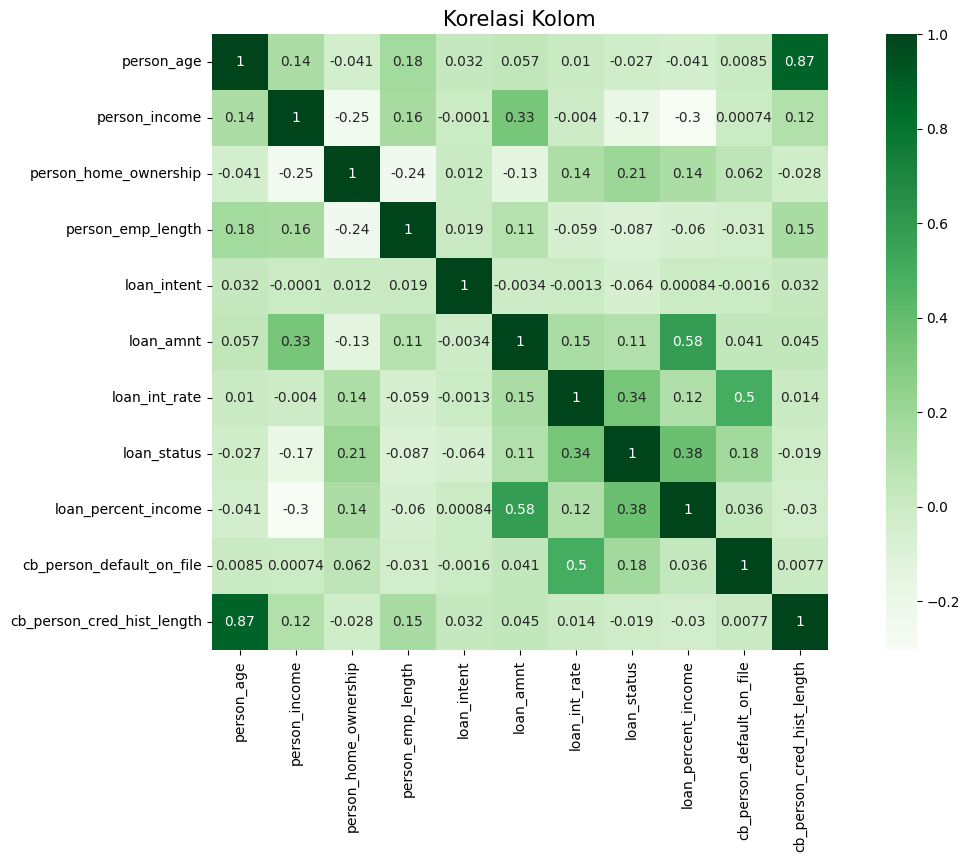

In [37]:
# periksa korelasi antar kolom
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.select_dtypes(include=np.number).corr(), vmax =1., square = True, annot = True,cmap='Greens' )
plt.title('Korelasi Kolom',fontsize=15);

## 6. Prapemrosesan Data

Preproses data: sesuaikan porsi data berdasarkan loan_status

In [38]:
data['loan_status'].value_counts()

loan_status
0    22220
1     6157
Name: count, dtype: int64

In [39]:
cleaned_data = data.copy()

In [40]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28377 entries, 0 to 28376
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28377 non-null  int64  
 1   person_income               28377 non-null  int64  
 2   person_home_ownership       28377 non-null  int64  
 3   person_emp_length           28377 non-null  float64
 4   loan_intent                 28377 non-null  int64  
 5   loan_grade                  28377 non-null  object 
 6   loan_amnt                   28377 non-null  int64  
 7   loan_int_rate               28377 non-null  float64
 8   loan_status                 28377 non-null  int64  
 9   loan_percent_income         28377 non-null  float64
 10  cb_person_default_on_file   28377 non-null  int64  
 11  cb_person_cred_hist_length  28377 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 2.6+ MB


In [41]:
cleaned_data['loan_status'].value_counts()

loan_status
0    22220
1     6157
Name: count, dtype: int64

In [42]:
rus = RandomUnderSampler(random_state=42)

X, y = rus.fit_resample( cleaned_data.drop(["loan_status"], axis=1), cleaned_data["loan_status"])

In [43]:
y.value_counts()

loan_status
0    6157
1    6157
Name: count, dtype: int64

In [44]:
y.head()

2484     0
20454    0
12579    0
25179    0
13192    0
Name: loan_status, dtype: int64

In [45]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2484,24,35000,2,1.0,2,D,7000,16.29,0.20,1,4
20454,31,80000,3,1.0,1,C,8000,12.61,0.10,1,7
12579,22,30000,2,5.0,4,B,3000,10.36,0.10,0,2
25179,33,123000,3,5.0,1,B,12000,11.83,0.10,0,10
13192,25,120000,0,7.0,3,A,4000,5.42,0.03,0,3


Proses data

In [46]:
# Mengahpus kolom 'loan grade'
X = X.drop(['loan_grade'], axis=1)

In [47]:
# Pembagian Data untuk Pelatihan dan Pengujian
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [48]:
print(x_train.shape,x_test.shape)

(8619, 10) (3695, 10)


In [49]:
x_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [50]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 8619 entries, 5943 to 3198
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
8619 non-null   int64
dtypes: int64(1)
memory usage: 134.7 KB


In [51]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 3695 entries, 12529 to 25170
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
3695 non-null   int64
dtypes: int64(1)
memory usage: 57.7 KB


In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8619 entries, 5943 to 3198
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  8619 non-null   int64  
 1   person_income               8619 non-null   int64  
 2   person_home_ownership       8619 non-null   int64  
 3   person_emp_length           8619 non-null   float64
 4   loan_intent                 8619 non-null   int64  
 5   loan_amnt                   8619 non-null   int64  
 6   loan_int_rate               8619 non-null   float64
 7   loan_percent_income         8619 non-null   float64
 8   cb_person_default_on_file   8619 non-null   int64  
 9   cb_person_cred_hist_length  8619 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 740.7 KB


In [53]:
x_train.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
26624,40,38000,3,4.0,0,7000,15.99,0.18,0,16
23626,27,50000,3,1.0,5,15000,13.16,0.30,0,9
3001,23,55000,3,2.0,3,10800,8.88,0.20,0,2
3898,22,50000,3,7.0,3,4800,12.68,0.10,0,3
3198,23,14400,3,0.0,5,4000,10.74,0.28,0,3


In [54]:
y_train.tail()

26624    1
23626    0
3001     0
3898     0
3198     1
Name: loan_status, dtype: int64

In [55]:
x_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
12529,25,61000,3,1.0,4,14400,12.53,0.24,0,2
10741,26,32000,3,6.0,3,12000,8.94,0.38,0,3
22973,35,99000,0,12.0,3,3000,10.99,0.03,0,9
10901,24,74600,0,3.0,0,20000,17.51,0.27,0,3
16311,34,39672,3,18.0,1,16750,13.98,0.42,0,9


In [56]:
y_test.head()

12529    0
10741    1
22973    0
10901    1
16311    1
Name: loan_status, dtype: int64

## 7. Pelatihan & Pengujian Sklearn

In [57]:
from sklearn.metrics import accuracy_score, f1_score

model = Pipeline(
    steps=[
        ("model", ExtraTreesClassifier())
    ]
)
model.fit(x_train, y_train)

Pipeline(steps=[('model', ExtraTreesClassifier())])

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score

# uji model
predict = model.predict(x_test)
akurasi = accuracy_score(y_test, predict)
f1 = f1_score(y_test, predict, average='macro')

print("Accuracy: {}%, F1: {}".format(round(akurasi, 2), round(f1, 2) ) )

Accuracy: 0.83%, F1: 0.83


In [59]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {round(akurasi, 2)}, F1 Score = {round(f1, 2)}.")

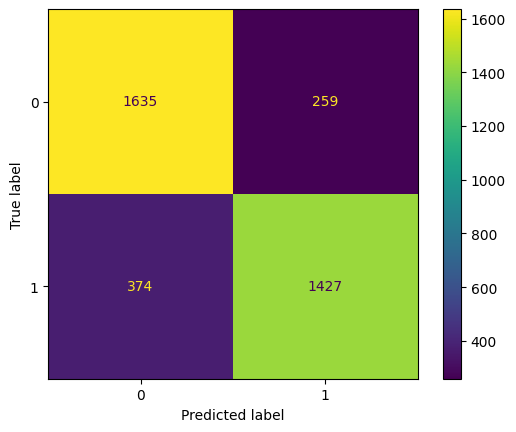

In [ ]:
cm = confusion_matrix(y_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

In [61]:
print(classification_report(y_test, predict) )

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1894
           1       0.85      0.79      0.82      1801

    accuracy                           0.83      3695
   macro avg       0.83      0.83      0.83      3695
weighted avg       0.83      0.83      0.83      3695



In [62]:
sio.dump(model, "Model/credit_loan_detection.skops")

unknown_types = get_untrusted_types(file="Model/credit_loan_detection.skops")
print(unknown_types)

[]


In [63]:
unknown_types = get_untrusted_types(file="Model/credit_loan_detection.skops")
sio.load("Model/credit_loan_detection.skops", trusted=unknown_types)

Pipeline(steps=[('model', ExtraTreesClassifier())])